In [1]:
%matplotlib inline
import numpy as np
import scipy.ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import pandas as pd
import dask
import os.path
from __future__ import division
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)


from useful import *

global data_dir
data_dir = '/scratch/ap587/dry_data/'


<xarray.Dataset>
Dimensions:  (lat: 64, latb: 65, lonb: 129, pfull: 32, phalf: 33, time: 1080)
Coordinates:
  * phalf    (phalf) float64 0.0 31.25 62.5 93.75 125.0 156.2 187.5 218.8 ...
  * latb     (latb) float64 -90.0 -86.58 -83.76 -80.96 -78.16 -75.36 -72.57 ...
  * lonb     (lonb) float64 -1.406 1.406 4.219 7.031 9.844 12.66 15.47 18.28 ...
  * pfull    (pfull) float64 11.5 45.98 77.6 109.0 140.3 171.6 202.9 234.2 ...
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * time     (time) float64 2.378e+04 2.381e+04 2.383e+04 2.386e+04 ...
Data variables:
    ps       (time, lat) float64 9.942e+04 9.944e+04 9.938e+04 9.922e+04 ...
    h_trop   (time, lat) float64 9.137 9.134 9.132 9.13 9.271 9.428 9.427 ...
    temp     (time, pfull, lat) float64 211.3 210.5 209.6 208.9 208.5 208.0 ...
    ucomp    (time, pfull, lat) float64 -2.66 -3.709 -1.547 1.635 3.702 ...
    vcomp    (time, pfull, lat) float64 0.06497 0.1328 0.1655 0.1398 0.05701 ...
    bk       (t

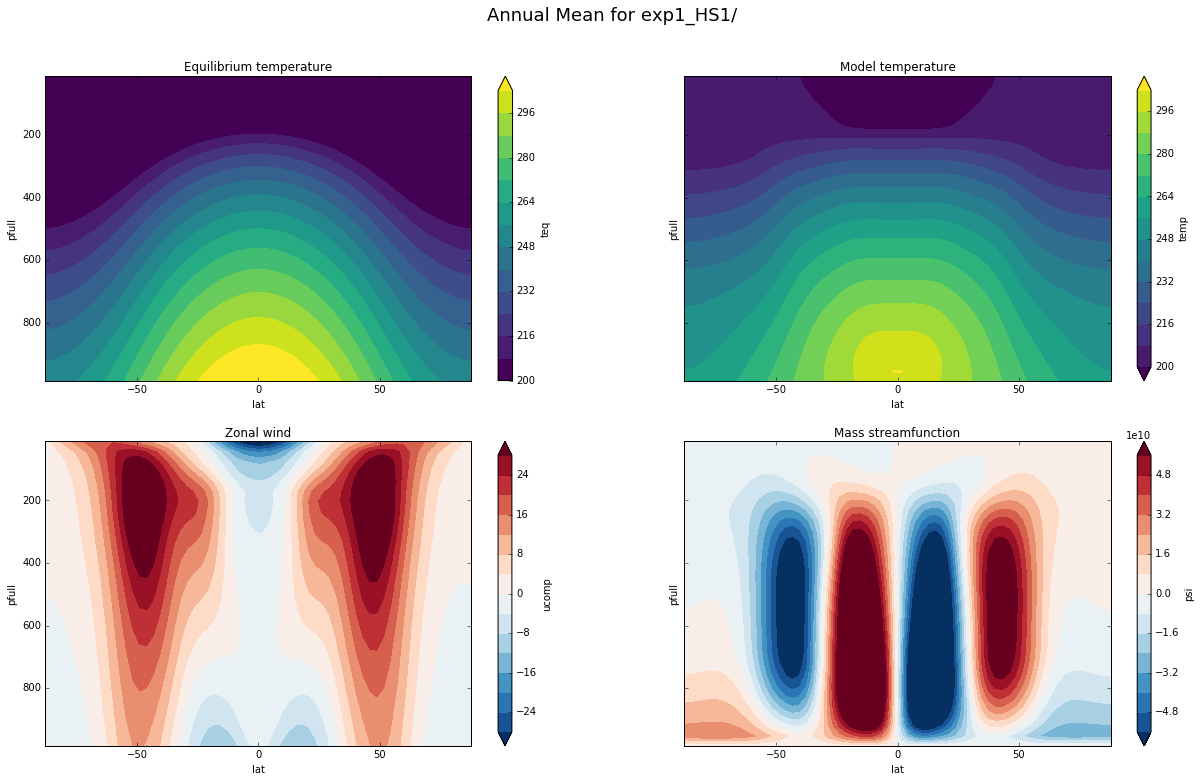

In [2]:
def testfun(exp):
    runs = range(12,24)
    runset = open_runset(data_dir, exp,runs)    
    
    runset.drop(['ps','vor','div']) 
    c = runset.mean('lon')
    
    print(c)
    c.load()
    
    data = {'omega':c.omega.data, 'vcomp':c.vcomp.data, 'time':c.time.data, 'pfull':c.pfull.data, 'lat':c.lat.data}
    #data.load()
    psi = cal_stream_fn(data)
    c['psi'] = (('time','pfull','lat'),psi)
    
    do_log = 0
    vmaxt = 300
    vmint = 200
    vmaxu = 25
    vmaxsf = 0.5e11
    
    plot_grid_sf(c, 'Annual Mean for exp' + exp, do_log=do_log, vmaxt=vmaxt, vmint=vmint,vmaxu=vmaxu,vmaxsf=vmaxsf)
    
    c.close()

    
    
exp = '1_HS1/'
testfun(exp)

<xarray.DataArray 'temp' (pfull: 32, lat: 64)>
dask.array<mean_ag..., shape=(32, 64), dtype=float64, chunksize=(32, 64)>
Coordinates:
  * pfull    (pfull) float64 11.5 45.98 77.6 109.0 140.3 171.6 202.9 234.2 ...
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...


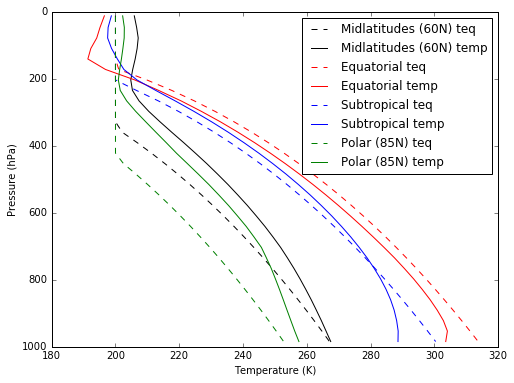

In [3]:
runs = range(12,24)
exp = '1_HS1/'
runset = open_runset(data_dir, exp,runs)   

a = runset.temp.mean('lon').mean('time')

plt_vert_structure(runset)


print a

#a.isel(lat=10).plot()
#sel_data = a.isel(lat=10)
#plt.plot(a.isel(lat=10).data, a.isel(lat=10).pfull.data)
#plt.gca().invert_yaxis()
